# Regression for Data Cleaning Approach 1 (Categorized Data)

In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import psycopg2
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
%matplotlib inline

In [36]:
data = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/clean_data.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Artist_ID,Index,User_ID,Track,Time,Rating,Edgy_,Negative_,Sensitive_,Stylish_,...,LIST_OWN_1.0,LIST_OWN_2.0,LIST_OWN_3.0,LIST_OWN_4.0,LIST_OWN_5.0,LIST_BACK_1.0,LIST_BACK_2.0,LIST_BACK_3.0,LIST_BACK_4.0,LIST_BACK_5.0
0,1.0,163270,3566.0,5,18,41,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3.0,159391,3566.0,9,18,16,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,144298,3566.0,4,18,44,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.0,74698,3566.0,11,18,71,1,0,1,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,14.0,173934,11495.0,32,19,42,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [37]:
data.shape

(111460, 57)

In [38]:
n_users = data.User_ID.nunique()
n_artists = data.Artist_ID.nunique()

In [39]:
# Take a quick look at the sparsity of our dataset.
sparsity=round(1.0-len(data)/float(n_users*n_artists),3)
print('The sparsity level of the dataset is ' +  str(sparsity*100) + '%')

The sparsity level of the dataset is 91.2%


In [40]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [41]:
result = data['Artist_ID'].unique()

In [42]:
## Double-checking number of artists we're using in our final dataset.
counteryes = 0
counterno = 0
for ID in range(0,50,1):    #50 total artist IDs, ranging from 0 to 49:
    if ID in result:
        counteryes +=1
    else:
        counterno += 1
        print 'OUT: {}'.format(ID)
        
print "Percent of artists remaining in dataset: {:.2%}".format(float(counteryes) / (counteryes + counterno))

OUT: 26
OUT: 27
OUT: 28
OUT: 29
OUT: 30
OUT: 34
OUT: 35
OUT: 36
OUT: 37
OUT: 38
OUT: 39
Percent of artists remaining in dataset: 78.00%


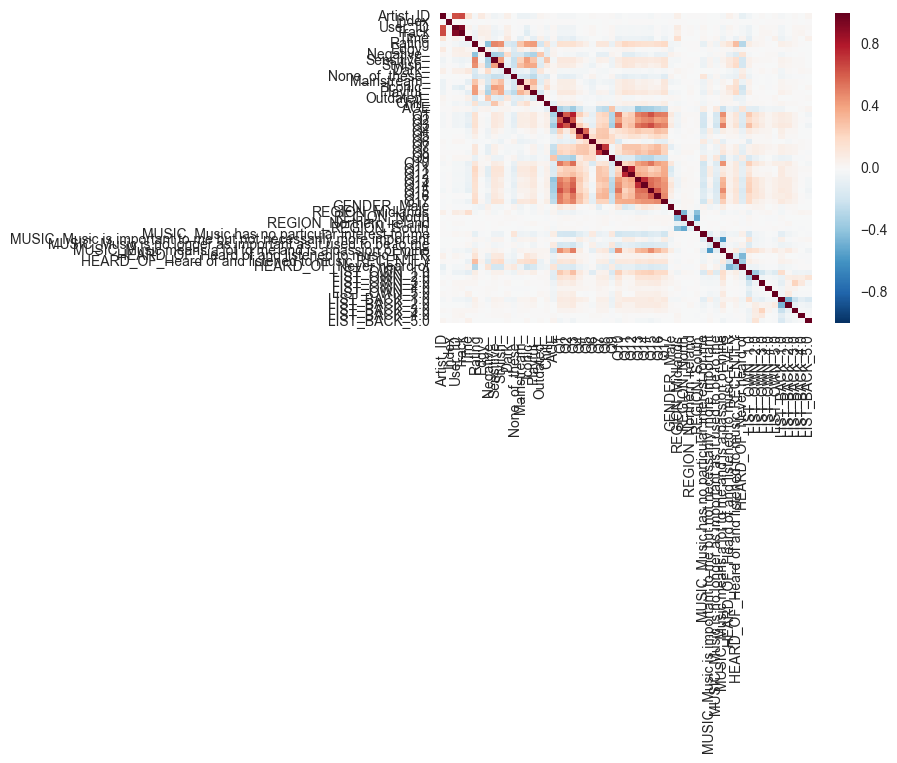

In [43]:
sns.heatmap(data.corr())

In [44]:
# Split training and testing data
X = data.drop(['Rating','Index'], axis=1)
y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Linear Regression

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
#Regression intercept
lr.intercept_

0.19137614991031704

In [30]:
coeff_data = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_data

,Coefficient
Artist_ID,3.898777e-04
User_ID,1.087851e-06
Track,-2.817377e-04
Time,2.305817e-04
HEARD_OF,-2.608867e-14
Edgy_,-1.377526e-02
Negative_,-8.425190e-02
Sensitive_,9.756986e-02
Stylish_,7.234689e-02
Dark_,-3.342387e-02


In [31]:
predictions = lr.predict(X_test)

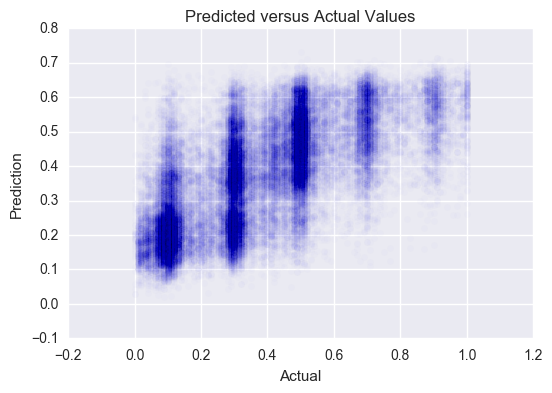

In [32]:
plt.scatter(y_test, predictions, alpha=0.01)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title("Predicted versus Actual Values")

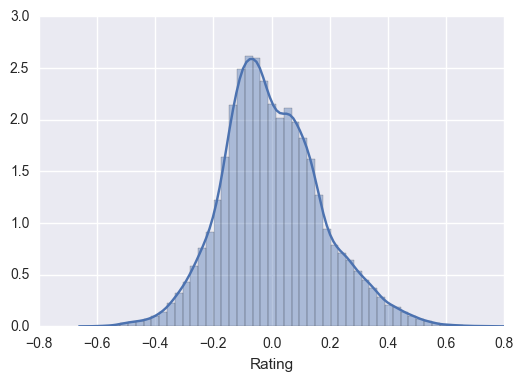

In [33]:
# Residual histogram
sns.distplot((y_test-predictions),bins=50);

## Linear Regression Performance

In [51]:
from sklearn import metrics

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

('MAE:', 0.13555552092468848)
('MSE:', 0.029657771098114682)
('RMSE:', 0.17221431734357825)


# Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [46]:
reg_RF = RandomForestRegressor(n_estimators=2000, n_jobs=3)

In [47]:
reg_RF.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=2000, n_jobs=3, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [48]:
RF_predictions = reg_RF.predict(X_test)

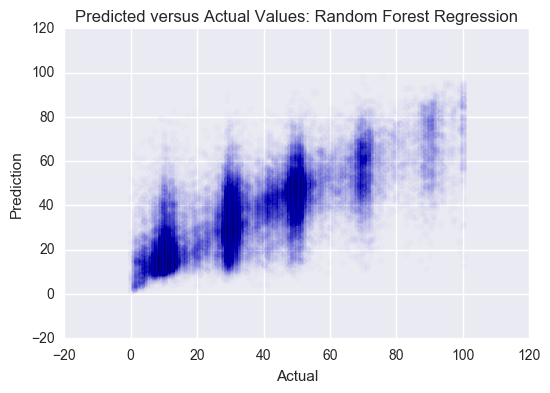

In [49]:
plt.scatter(y_test, RF_predictions, alpha=0.01)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title("Predicted versus Actual Values: Random Forest Regression")

In [52]:
print 'MAE:', metrics.mean_absolute_error(y_test, RF_predictions)
print 'MSE:', metrics.mean_squared_error(y_test, RF_predictions)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RF_predictions))

MAE: 11.3454329692
MSE: 230.885132085
RMSE: 15.1949048067


In [ ]:
sns.distplot(y_test, kde=False)
sns.distplot(RF_predictions, kde=False)
plt.title('Actual Rating (Blue) vs. Predicted Random Forest Rating (Green)');

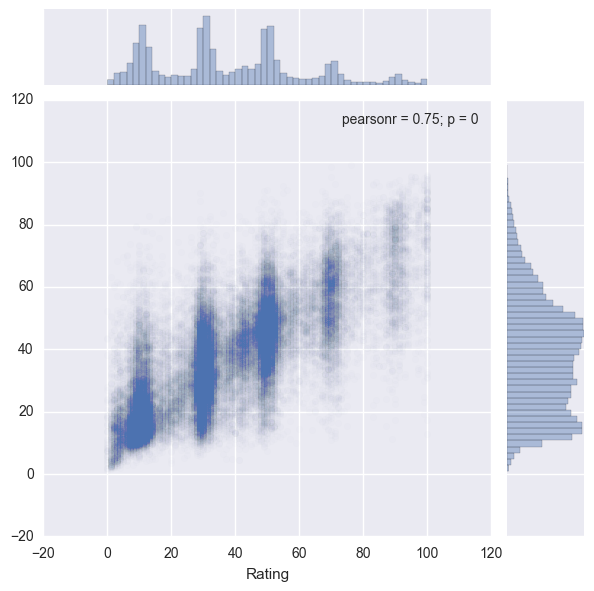

In [53]:
sns.jointplot(y_test, RF_predictions, alpha=0.01)

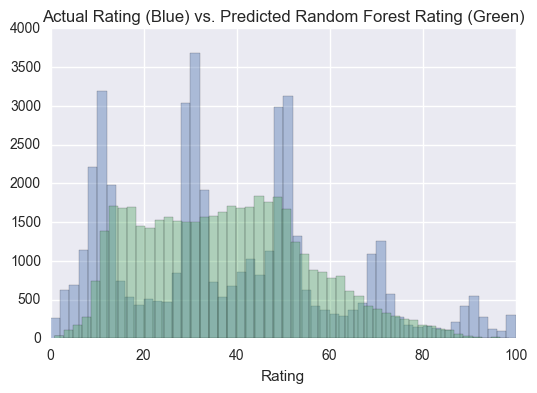

In [69]:
sns.distplot(y_tf_test, kde=False)
sns.distplot(RF_tf_predictions, kde=False)
plt.title('Actual Rating (Blue) vs. Predicted Random Forest Rating (Green)');

## Computing Random Forest with Top 26 Features (>0.01)

When we use features that have more than a 0.01 effect on the predicted rating, we get similar results to the original random forest run with all model features. This is likely because the top 26 features account for over 90% of the effect on the model predictions.

In [54]:
feat_imp = reg_RF.feature_importances_

In [55]:
rf_df = pd.DataFrame(data=feat_imp).T
rf_df.columns = X_train.columns
rf_df = rf_df.T
rf_df.columns = ['Feature_Importance']

In [56]:
top_features = rf_df.sort_values(by='Feature_Importance', ascending=False)[:26].T.columns

In [57]:
top_to_plot = rf_df.sort_values(by='Feature_Importance', ascending=False)[:5]

In [76]:
# Cumulative sum of feature importance of top 26 features
np.cumsum(rf_df.sort_values(by='Feature_Importance', ascending=False)[:26])

,Feature_Importance
Sensitive_,0.232398
Playful_,0.307726
Track,0.364279
Negative_,0.402854
Stylish_,0.439867
HEARD_OF_Heard of and listened to music RECENTLY,0.474024
User_ID,0.499726
Q11,0.523972
AGE,0.547708
Q9,0.571102


In [70]:
top_to_plot['Feature_Importance']

Sensitive_    0.232398
Playful_      0.075328
Track         0.056553
Negative_     0.038575
Stylish_      0.037013
Name: Feature_Importance, dtype: float64

In [59]:
#Plot top features
labels = ['Sensitive', 'Playful', 'Track', 'Stylish', 'Negative']

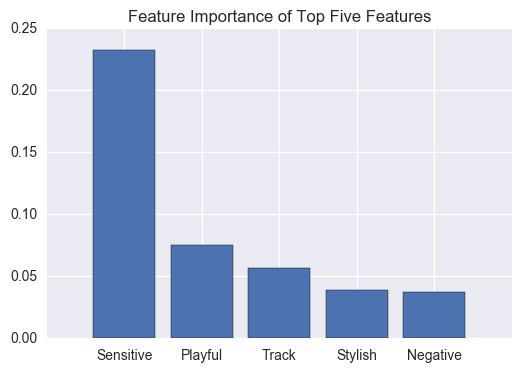

In [60]:
plt.bar([0, 1, 2, 3, 4], list(top_to_plot['Feature_Importance']), align = 'center', tick_label = labels)
plt.title('Feature Importance of Top Five Features');

In [61]:
# Split training and testing data
X_tf = data[top_features]
y_tf = data['Rating']
X_tf_train, X_tf_test, y_tf_train, y_tf_test = train_test_split(X_tf, y_tf, test_size=0.4, random_state=101)

In [62]:
reg_RF_tf = RandomForestRegressor(n_estimators=2000)
reg_RF_tf.fit(X_tf_train, y_tf_train)
RF_tf_predictions = reg_RF_tf.predict(X_tf_test)

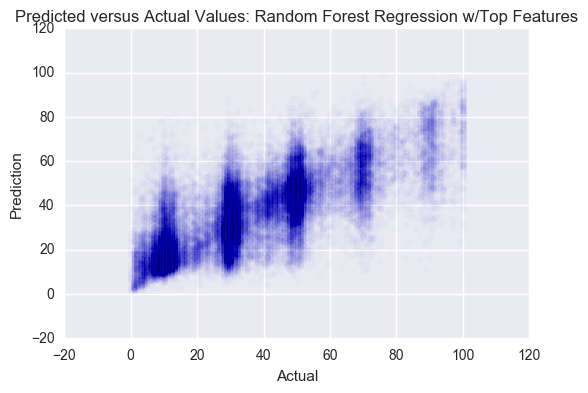

In [63]:
plt.scatter(y_tf_test, RF_tf_predictions, alpha=0.01)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title("Predicted versus Actual Values: Random Forest Regression w/Top Features")

In [64]:
print 'MAE:', metrics.mean_absolute_error(y_test, RF_predictions)
print 'MSE:', metrics.mean_squared_error(y_test, RF_predictions)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RF_predictions))

MAE: 11.3454329692
MSE: 230.885132085
RMSE: 15.1949048067


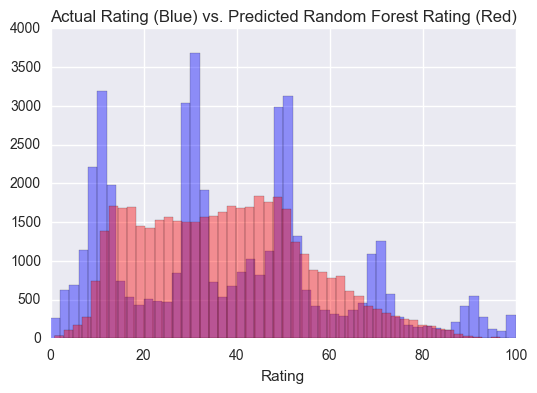

In [67]:
sns.distplot(y_tf_test, kde=False, color='b')
sns.distplot(RF_tf_predictions, kde=False, color='r')
plt.title('Actual Rating (Blue) vs. Predicted Random Forest Rating (Red)');

# Random Forests with Max Depth Limits

**This approach to random forests, as seen below, didn't work particularly well compared to allowing trees to run to a maximum depth.**

In [143]:
reg_RF_md = RandomForestRegressor(n_estimators=2000, max_depth=4)

In [144]:
reg_RF_md.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=2000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [145]:
RF_md_predictions = reg_RF_md.predict(X_test)

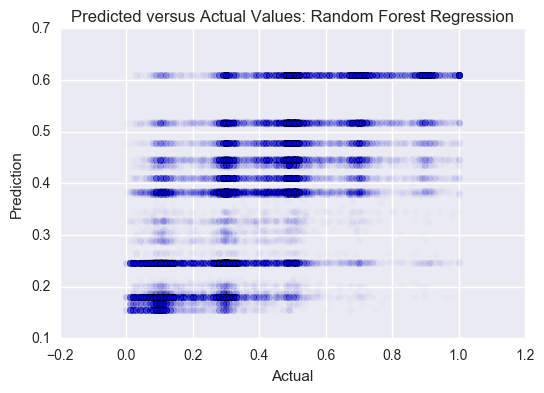

In [146]:
plt.scatter(y_test, RF_md_predictions, alpha=0.01)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title("Predicted versus Actual Values: Random Forest Regression")

In [147]:
print 'MAE:', metrics.mean_absolute_error(y_test, RF_md_predictions)
print 'MSE:', metrics.mean_squared_error(y_test, RF_md_predictions)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RF_md_predictions))

MAE: 0.140656839813
MSE: 0.0315389659678
RMSE: 0.177592133744


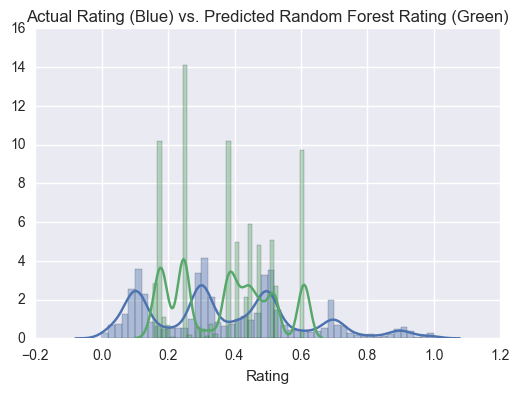

In [148]:
sns.distplot(y_train)
sns.distplot(RF_md_predictions)
plt.title('Actual Rating (Blue) vs. Predicted Random Forest Rating (Green)');

## Random Forest with Truncated Limbs

In [132]:
reg_RF_tf_t = RandomForestRegressor(n_estimators=2000, max_depth=8)
reg_RF_tf_t.fit(X_tf_train, y_tf_train)
RF_tf_t_predictions = reg_RF_tf_t.predict(X_tf_test)

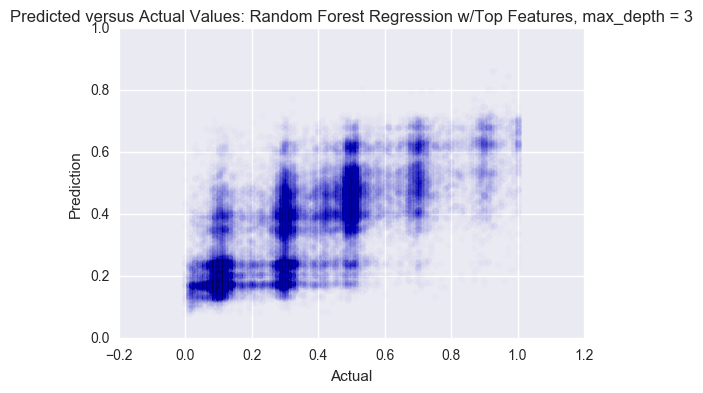

In [133]:
plt.scatter(y_tf_test, RF_tf_t_predictions, alpha=0.01)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title("Predicted versus Actual Values: Random Forest Regression w/Top Features, max_depth = 3")

In [134]:
print 'MAE:', metrics.mean_absolute_error(y_tf_test, RF_tf_t_predictions)
print 'MSE:', metrics.mean_squared_error(y_tf_test, RF_tf_t_predictions)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RF_tf_t_predictions))

MAE: 0.133142140583
MSE: 0.0283959215276
RMSE: 0.168510894388


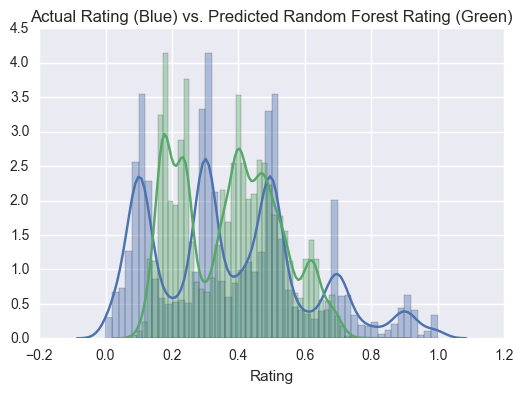

In [135]:
sns.distplot(y_tf_test)
sns.distplot(RF_tf_t_predictions)
plt.title('Actual Rating (Blue) vs. Predicted Random Forest Rating (Green)');

# Gradient Booster

Gradient boosting 

In [77]:
#GBR = GradientBoostingRegressor(n_estimators=200, learning_rate=0.4,\
#                                max_depth=6, random_state=0, loss='ls').fit(X_train, y_train)
# RMSE of above is 15.6581
GBR = GradientBoostingRegressor()
GBR.set_params(n_estimators=2000, learning_rate=0.2, warm_start=True,\
                                random_state=0, loss='ls')
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=2000,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=True)

In [79]:
GBR_predictions = GBR.predict(X_test)
for i in GBR_predictions:
    if i < 0:
        i = 0
    else:
        i = i

In [80]:
GBR_predictions

array([ 58.35831993,  39.79525529,  19.64235871, ...,  12.44276775,
        13.64378443,  20.54387255])

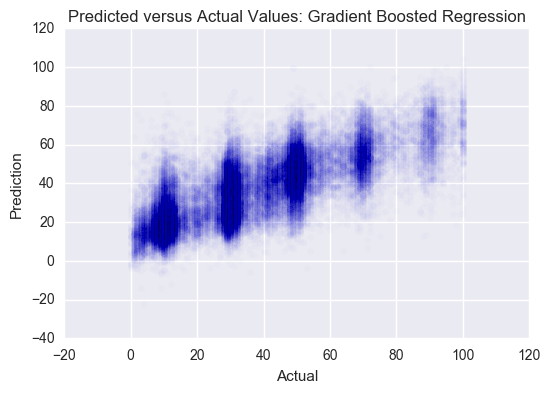

In [81]:
plt.scatter(y_test, GBR_predictions, alpha=0.01)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title("Predicted versus Actual Values: Gradient Boosted Regression")

In [82]:
print 'MAE:', metrics.mean_absolute_error(y_test, GBR_predictions)
print 'MSE:', metrics.mean_squared_error(y_test, GBR_predictions)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, GBR_predictions))

MAE: 11.9566712902
MSE: 236.991990564
RMSE: 15.3945441818


In [235]:
feature_importance = pd.DataFrame({'Feature': X_test.columns, 'Importance': GBR.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending = False)

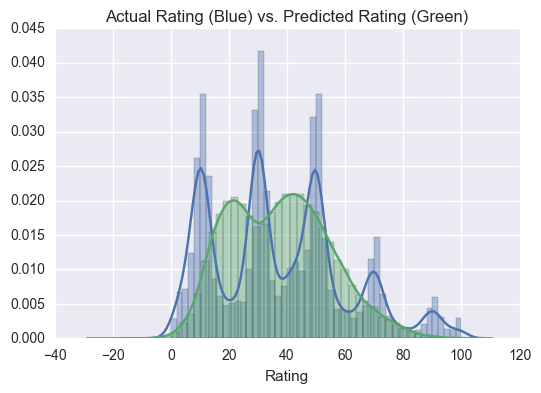

In [83]:
sns.distplot(y_train)
sns.distplot(GBR_predictions)
plt.title('Actual Rating (Blue) vs. Predicted Rating (Green)');

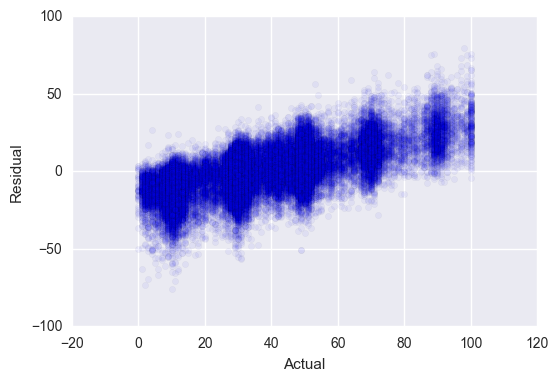

In [84]:
# Residual histogram
plt.scatter(y_test,(y_test-GBR_predictions), alpha=0.05)
plt.xlabel('Actual')
plt.ylabel('Residual');